<a href="https://colab.research.google.com/github/vicsladk/IBMTest/blob/main/venda_de_casas_no_King_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install pandas

In [3]:
%pip  install numpy

In [4]:
%pip install matplotlib

In [5]:
%pip install seaborn

In [7]:
%pip install scikit-learn

# **Importar as Bibliotecas**

In [13]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [14]:
!pip install -U scikit-learn

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

%pip install scikit-learn
!pip install -U scikit-learn

# **Importando a Base de Dados**

O conjunto de dados contém preços de venda de casas no King County, que inclui Seattle. Ele inclui casas vendidas entre maio de 2014 e maio de 2015.

In [24]:
# prompt: Quero importar uma base de dados

df=pd.read_csv('/content/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# **Questão 1**

Exiba os tipos de dados de cada coluna usando a função dtypes

In [25]:
df.dtypes

,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


# **Questão 2**
Remova as colunas "id" e "Unnamed: 0" do eixo 1 usando o método drop() e, em seguida, use o método describe() para obter um resumo estatístico dos dados. Certifique-se de que o parâmetro inplace esteja definido como True.

In [27]:
df.drop(['id'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


from matplotlib import pyplot as plt
_df_0['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['bedrooms'].plot(kind='hist', bins=20, title='bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['bathrooms'].plot(kind='hist', bins=20, title='bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['sqft_living'].plot(kind='hist', bins=20, title='sqft_living')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='price', y='bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='bedrooms', y='bathrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='bathrooms', y='sqft_living', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='sqft_living', y='sqft_lot', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['bedrooms'].plot(kind='line', figsize=(8, 4), title='bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['bathrooms'].plot(kind='line', figsize=(8, 4), title='bathrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['sqft_living'].plot(kind='line', figsize=(8, 4), title='sqft_living')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='price', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='bedrooms', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='bathrooms', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='sqft_living', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **Questão 3**
Use o método value_counts para contar o número de casas com valores de andares únicos e use o método .to_frame() para convertê-lo em um dataframe.

In [29]:
andar_counts = df['floors'].value_counts().to_frame()
andar_counts

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


# **Questão 4**
Use a função boxplot da biblioteca Seaborn para determinar se casas com ou sem vista para o mar apresentam mais valores discrepantes de preço.

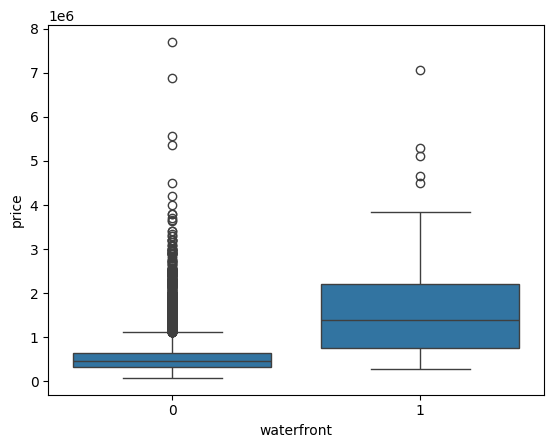

In [30]:
sns.boxplot(x="waterfront", y="price", data=df)
plt.show()

# **Questão 5**
Use a função regplot na biblioteca Seaborn para determinar se o atributo sqft_above está correlacionado negativa ou positivamente com o preço.

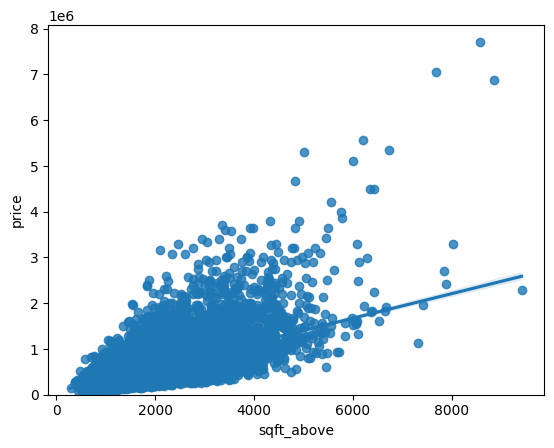

In [31]:
sns.regplot(x="sqft_above", y="price", data=df)
plt.ylim(0,)
plt.show()

# **Desenvolvimento de Modelos**

In [33]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

# **Questão 6**
Ajuste um modelo de regressão linear para prever o "preço" usando o recurso "sqft_living" e calcule o R².

Coeficiente da regressão:  [280.6235679]
Intercepto da regressão:  -43580.74309447396
R² do modelo:  0.4928532179037931


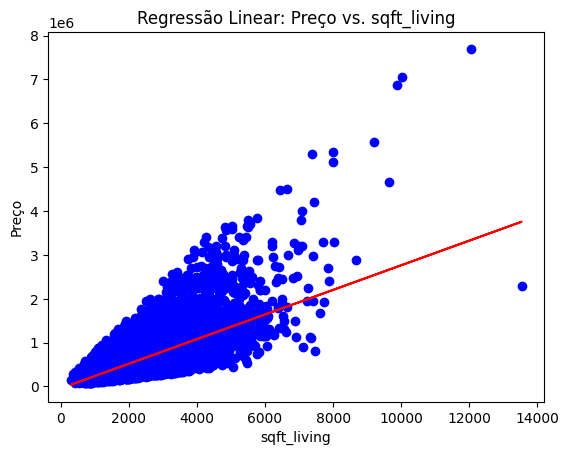

In [37]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)

print("Coeficiente da regressão: ", lm.coef_)
print("Intercepto da regressão: ", lm.intercept_)

R2 = lm.score(X, Y)
print("R² do modelo: ", R2)

# Opcional: Visualizar a regressão
plt.scatter(X, Y, color='blue')
plt.plot(X, lm.predict(X), color='red')
plt.title('Regressão Linear: Preço vs. sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('Preço')
plt.show()

# **Questão 7**
Ajuste um modelo de regressão linear para prever o "preço" usando a lista de características:

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

Em seguida, calcule o R^2.

In [39]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

X = df[features]
Y = df['price']

lm = LinearRegression()
lm.fit(X, Y)

print("Coeficientes da regressão: ", lm.coef_)
print("Intercepto da regressão: ", lm.intercept_)

R2 = lm.score(X, Y)
print("R² do modelo: ", R2)

Coeficientes da regressão:  [-2.93506755e+04  6.02163807e+05  6.73032296e+05 -2.58576191e+04
  6.44649631e+01  6.70524927e+04 -3.47249675e+03  4.31579036e+00
  6.49374282e+01  8.21667080e+04  1.29402390e+02]
Intercepto da regressão:  -32393033.998165317
R² do modelo:  0.6577151058279325


# **Questão 8**
Use a lista para criar um objeto de pipeline para prever o "preço", ajuste o objeto usando os recursos da lista e calcule o R².

Criando uma lista de tuplas, o primeiro elemento na tupla contém o nome do estimador:

'scale'

'polynomial'

'model'

O segundo elemento da tupla contém o construtor do modelo.

StandardScaler()

PolynomialFeatures(include_bias=False)

LinearRegression()

In [40]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [41]:
pipe=Pipeline(Input)
pipe.fit(X,Y)
R2_pipe = pipe.score(X,Y)
print("R² do pipeline: ", R2_pipe)


R² do pipeline:  0.7513467656307783


# **Avaliação e Refinamento do Modelo**

Importando os módulos necessários

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


Dividindo os dados em conjuntos de treinamento e teste

In [43]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


# **Questão 9**
Crie e ajuste um objeto de regressão Ridge usando os dados de treinamento, defina o parâmetro de regularização como 0,1 e calcule o R^2 usando os dados de teste.

In [44]:
from sklearn.linear_model import Ridge

# Criando o objeto de regressão Ridge
RidgeModel = Ridge(alpha=0.1)

# Ajustando o modelo com os dados de treinamento
RidgeModel.fit(x_train, y_train)

# Calculando o R^2 usando os dados de teste
R2_ridge = RidgeModel.score(x_test, y_test)

print("R² do modelo Ridge nos dados de teste: ", R2_ridge)


R² do modelo Ridge nos dados de teste:  0.6480374087702243


# **Questão 10**
Realize uma transformação polinomial de segunda ordem nos dados de treinamento e de teste. Crie e ajuste um objeto de regressão Ridge usando os dados de treinamento, defina o parâmetro de regularização como 0,1 e calcule o R^2 utilizando os dados de teste fornecidos.

In [45]:
# Realizando a transformação polinomial de segunda ordem
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)

# Criando e ajustando o objeto de regressão Ridge com dados transformados
RidgeModel_poly = Ridge(alpha=0.1)
RidgeModel_poly.fit(x_train_pr, y_train)

# Calculando o R^2 utilizando os dados de teste transformados
R2_ridge_poly = RidgeModel_poly.score(x_test_pr, y_test)

print("R² do modelo Ridge com transformação polinomial nos dados de teste: ", R2_ridge_poly)

R² do modelo Ridge com transformação polinomial nos dados de teste:  0.7004432075880809
